# Jonathan Halverson
# Friday, September 29, 2017
# Geron: Chapter 3 on Classification

In [1]:
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
import numpy as np

X, y = mnist['data'], mnist['target']
X = X.astype(np.float64)
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
digit_index = 36000
y[digit_index]

5.0

In [6]:
X[digit_index]

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,

In [7]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('halverson')
%matplotlib inline

(-0.5, 27.5, 27.5, -0.5)

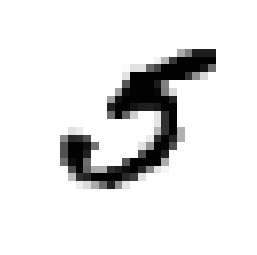

In [8]:
some_digit = X[digit_index]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis('off')

The data is already divided into a train and test set (at record 60000):

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
import numpy as np

In [11]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### Standardize the data

In [12]:
from sklearn.preprocessing import StandardScaler

std_sc = StandardScaler()
X_train_std = std_sc.fit_transform(X_train)

(array([  980.,  1135.,  1032.,  1010.,   982.,   892.,   958.,  1028.,
          974.,  1009.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Patch objects>)

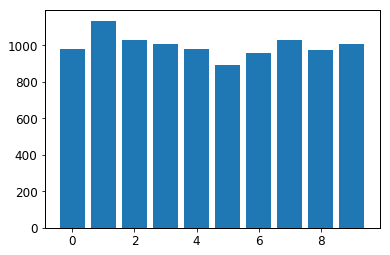

In [13]:
plt.hist(y_test, bins=np.linspace(-0.5, 9.5, 11), rwidth=0.8)

We see from the histogram above that the classes are not perfectly balanced.

### Training a binary classifier

In [14]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
y_train_5 = y_train_5.astype(np.int)
y_test_5 = y_test_5.astype(np.int)

In [15]:
y_train_5[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
y_train[:20]

array([ 2.,  0.,  7.,  7.,  9.,  7.,  2.,  2.,  2.,  2.,  6.,  3.,  3.,
        4.,  8.,  1.,  4.,  8.,  6.,  1.])

In [17]:
y_train_5.sum()

5421

In [18]:
from sklearn.linear_model import SGDClassifier

Below we use the test data which is in general bad practice at this point.

In [19]:
# Defaults to ‘hinge’, which gives a linear SVM
model = SGDClassifier(random_state=42)
model = model.fit(X_train, y_train_5)
y_pred = model.predict(X_test)

In [20]:
model.intercept_

array([ 89.30408887])

In [21]:
model.classes_

array([0, 1])

In [22]:
model.coef_

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,  -3.45516098e+00,  -1.68106871e+01,
         -1.55482244e+01,  -1.99336210e+00,  -4.95018256e+00,
         -7.64122140e-01,   0.00000000e+00,  -5.68108200e+00,
         -8.13956193e+00,  -7.70766680e+00,  -9.23591108e+00,
        

In [23]:
model.t_

300001.0

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_pred, y_test_5)

0.96930000000000005

We see that the accuracy appears high. It is important to note that only about 10% of the targets are fives so accuracy is not the best metric.

In [26]:
model.predict([X[digit_index]])

array([1])

The cross_val_score is nice because it doesn't touch the test data.

In [27]:
# For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass,
# StratifiedKFold is used. In all other cases, KFold is used.
from sklearn.model_selection import cross_val_score
y_train_scores = cross_val_score(SGDClassifier(random_state=42), X_train, y_train_5, cv=5, scoring='accuracy')
y_train_scores

array([ 0.96650279,  0.96591667,  0.95858333,  0.96216667,  0.96424702])

The cross_val_predict method gives the individual prediction for each case when it appears in the validation set, which happens only once during the cross validation procedure.

In [28]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(SGDClassifier(random_state=42), X_train, y_train_5, cv=5, method='decision_function')
y_train_pred

array([-110491.91549375, -647766.16298536, -169145.65791057, ...,
       -261114.3646135 , -840494.8728208 , -143640.25629994])

In [29]:
y_train_predict = cross_val_predict(SGDClassifier(random_state=42), X_train, y_train_5, cv=5)
y_train_predict

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
from sklearn.metrics import confusion_matrix

Still working with the training set here:

In [31]:
confusion_matrix(y_true=y_train_5, y_pred=y_train_predict)

array([[53860,   719],
       [ 1472,  3949]])

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_train_5, y_train_predict)

0.84597257926306768

In [33]:
recall_score(y_train_5, y_train_predict)

0.7284633831396421

In [34]:
f1_score(y_train_5, y_train_predict)

0.78283278818515201

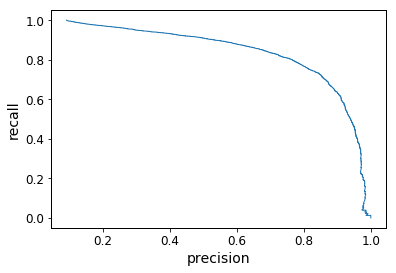

In [38]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_train_5, y_train_pred)
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')

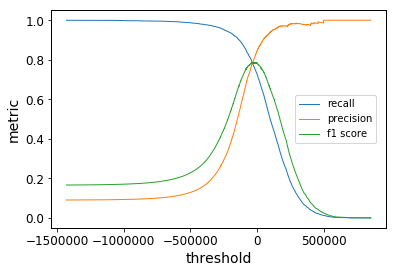

In [48]:
plt.plot(thresholds, recall[:-1], label='recall')
plt.plot(thresholds, precision[:-1], label='precision')
plt.plot(thresholds, 2.0 / (1.0 / recall[:-1] + 1.0 / precision[:-1]), label='f1 score')
plt.xlabel('threshold')
plt.ylabel('metric')
plt.legend()

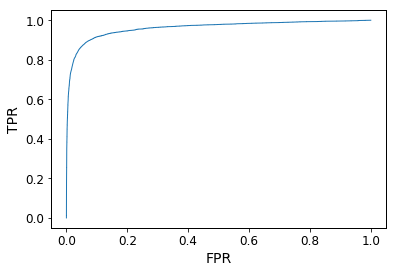

In [49]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_train_pred)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')